In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten

from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
data2=pd.read_json('contentss.json')

In [3]:
tags=[]
inputs=[]
responses={}
for intent in data2['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [4]:
data2=pd.DataFrame({"inputs":inputs,
                   "tags":tags})

In [12]:
data2


,inputs,tags
0,hello,greeting
1,hi there,greeting
2,hello,goodbye
3,hi there,goodbye
4,Hi,greeting
...,...,...
234,How do I know if I'm unwell?,fact-29
235,How can I maintain social connections? What if...,fact-30
236,What's the difference between anxiety and stress?,fact-31
237,What's the difference between sadness and depr...,fact-32


In [5]:
import string
data2['inputs']=data2['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data2['inputs']=data2['inputs'].apply(lambda wrd:''.join(wrd))

In [14]:
data2

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,hello,goodbye
3,hi there,goodbye
4,hi,greeting
...,...,...
234,how do i know if im unwell,fact-29
235,how can i maintain social connections what if ...,fact-30
236,whats the difference between anxiety and stress,fact-31
237,whats the difference between sadness and depre...,fact-32


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
# tokenizer.fit_on_text(data['inputs'])

tokenizer.fit_on_texts(data2['inputs'])
train=tokenizer.texts_to_sequences(data2['inputs'])
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data2['tags'])

In [7]:
input_shape=x_train.shape[1]
print(input_shape)

18


In [8]:
vocabulary=len(tokenizer.word_index)
print("number of unique words",vocabulary)
output_length=le.classes_.shape[0]
print("output length",output_length)

number of unique words 305
output length 81


In [9]:
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
# x=flatten()(x)
from tensorflow.keras.layers import Flatten

x = Flatten()(x)

x=Dense(output_length,activation="softmax")(x)
model=Model(i,x)

In [10]:

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])


In [11]:
train=model.fit(x_train,y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 6s 21ms/step - loss: 4.3934 - accuracy: 0.0209
Epoch 2/300
8/8 [==============================] - 0s 14ms/step - loss: 4.3757 - accuracy: 0.0544
Epoch 3/300
8/8 [==============================] - 0s 19ms/step - loss: 4.3505 - accuracy: 0.0628
Epoch 4/300
8/8 [==============================] - 0s 16ms/step - loss: 4.3012 - accuracy: 0.0628
Epoch 5/300
8/8 [==============================] - 0s 15ms/step - loss: 4.2223 - accuracy: 0.0669
Epoch 6/300
8/8 [==============================] - 0s 18ms/step - loss: 4.1198 - accuracy: 0.0586
Epoch 7/300
8/8 [==============================] - 0s 20ms/step - loss: 4.0532 - accuracy: 0.0586
Epoch 8/300
8/8 [==============================] - 0s 20ms/step - loss: 4.0395 - accuracy: 0.0586
Epoch 9/300
8/8 [==============================] - 0s 20ms/step - loss: 4.0121 - accuracy: 0.0586
Epoch 10/300
8/8 [==============================] - 0s 18ms/step - loss: 3.9985 - accuracy: 0.0586
Epoch 11/300
8/8 [=

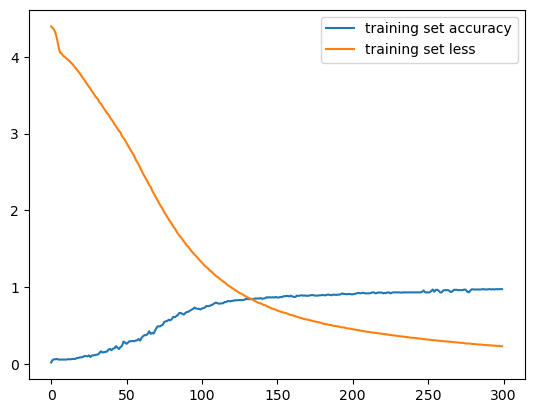

In [12]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set less')
plt.legend()

In [20]:
import random
import string  
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


while True:
    text_p = []
    prediction_input = input('You: ')
    
   
    prediction_input = [letter.lower() for letter in prediction_input if letter not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    
    text_p.append(prediction_input)
    prediction_input = tokenizer.texts_to_sequences(text_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    
   
    prediction_input = pad_sequences([prediction_input], input_shape)
    output = model.predict(prediction_input)
    output = output.argmax()
    response_tag = le.inverse_transform([output])[0]
    print("Bot:", random.choice(responses[response_tag]))
    
    
    if response_tag == "goodbye":
        break;




You: goodbye
1/1 [==============================] - 0s 47ms/step
Bot: Have a nice day.
